# The Battle of Neighbourhoods: Restaurant Opportunities around universities in Chicago - Python Code

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

import seaborn as sns
import matplotlib.pyplot as plt

!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

from pandas import DataFrame # import DataFrame to transform list into a dataframe

! pip install folium==0.5.0
import folium # plotting library

print('Libraries imported')

     |████████████████████████████████| 79 kB 10.3 MB/s eta 0:00:01
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=fb84e65186efc228be02d98719cbd495158695927b1cbb0d8aa5943a666b4d3b
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium
Libraries imported


In [2]:
# Foursquare free Developer ID credentials
CLIENT_ID = 'YGCNMIPV2UU0YPH0NDFJLBWYDM2RGHUG11J3HSRWCSSURGFE' # Foursquare ID
CLIENT_SECRET = '0TBN0S2J4WYNJ0W3N04MWIC2FFZGT2REJWQCRU3JIDM5U2XR' # Foursquare Secret
ACCESS_TOKEN = 'QSNKL2W3BDBKKFYSK1CJ23S4G4UKWPG5ECDP5ZAWJMQOHZMG' # FourSquare Access Token
VERSION = '20180604'
LIMIT = 30

In [14]:
# Due to the use of premium calls which has a daily quota, queries were stored into CSV regularly using below code. 

#from project_lib import Project

#project = Project(project_id='XX', project_access_token='YY')
#pc = project.project_context

#project.save_data(data=AAdataframe.to_csv(index=False),file_name='ZZ.csv',overwrite=True)

# Then the CSV was imported back in to add on the results of subsequent queries.

# University of Illinois at Chicago

In [3]:
# To find the latitude and longitude for University of Illinois at Chicago

address = '1200 W Harrison St, Chicago, IL'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
UIClatitude = location.latitude
UIClongitude = location.longitude
# Latitude = 41.87483585. Longitude = -87.65827661495084

# search query to find restaurants within 2km of the University of Illinois at Chicago
search_query = 'Restaurant'
radius = 2000

# extract search query into a json
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, UIClatitude, UIClongitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
UICdataframe = json_normalize(venues)
UICdataframe.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:23: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,...,location.country,location.formattedAddress,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,venuePage.id,location.neighborhood
0,4a805101f964a520f0f41fe3,Athena Greek Restaurant,"[{'id': '4bf58dd8d48988d10e941735', 'name': 'G...",v-1615795571,False,212 S Halsted St,btwn W Adams St & W Jackson Blvd,41.878871,-87.647309,"[{'label': 'display', 'lat': 41.87887126409897...",...,United States,[212 S Halsted St (btwn W Adams St & W Jackson...,1435933,https://www.grubhub.com/restaurant/athena-212-...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,33174413,NaN
1,4a08f0f9f964a52027741fe3,Wishbone Restaurant,"[{'id': '4bf58dd8d48988d14f941735', 'name': 'S...",v-1615795571,False,161 N Jefferson St,at Randolph,41.882858,-87.652054,"[{'label': 'display', 'lat': 41.88285765741019...",...,United States,"[161 N Jefferson St (at Randolph), Chicago, IL...",NaN,NaN,NaN,NaN,NaN,NaN,36014459,NaN
2,5f76721f3d7c6467d25f1235,Nobu Restaurant,"[{'id': '4bf58dd8d48988d111941735', 'name': 'J...",v-1615795571,False,854 W Randolph St,NaN,41.884785,-87.649730,"[{'label': 'display', 'lat': 41.884785, 'lng':...",...,United States,"[854 W Randolph St, Chicago, IL 60607]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4c1a88e48b3aa59371c4955f,S&S Restaurant,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",v-1615795571,False,823 W Randolph St,at Green St,41.884060,-87.648460,"[{'label': 'display', 'lat': 41.88405990600586...",...,United States,"[823 W Randolph St (at Green St), Chicago, IL ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4bdb74b12a3a0f47d837afb6,Franconello Italian Restaurant,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",v-1615795571,False,1301 S Halsted St,NaN,41.865194,-87.646883,"[{'label': 'display', 'lat': 41.865194, 'lng':...",...,United States,"[1301 S Halsted St, Chicago, IL 60607]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in UICdataframe.columns if col.startswith('location.')] + ['id']
UICdataframe_filtered = UICdataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
UICdataframe_filtered['categories'] = UICdataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
UICdataframe_filtered.columns = [column.split('.')[-1] for column in UICdataframe_filtered.columns]

UICdataframe_filtered.head()

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,Athena Greek Restaurant,Greek Restaurant,212 S Halsted St,btwn W Adams St & W Jackson Blvd,41.878871,-87.647309,"[{'label': 'display', 'lat': 41.87887126409897...",1013,60661,US,Chicago,IL,United States,[212 S Halsted St (btwn W Adams St & W Jackson...,NaN,4a805101f964a520f0f41fe3
1,Wishbone Restaurant,Southern / Soul Food Restaurant,161 N Jefferson St,at Randolph,41.882858,-87.652054,"[{'label': 'display', 'lat': 41.88285765741019...",1031,60661,US,Chicago,IL,United States,"[161 N Jefferson St (at Randolph), Chicago, IL...",NaN,4a08f0f9f964a52027741fe3
2,Nobu Restaurant,Japanese Restaurant,854 W Randolph St,NaN,41.884785,-87.649730,"[{'label': 'display', 'lat': 41.884785, 'lng':...",1314,60607,US,Chicago,IL,United States,"[854 W Randolph St, Chicago, IL 60607]",NaN,5f76721f3d7c6467d25f1235
3,S&S Restaurant,American Restaurant,823 W Randolph St,at Green St,41.884060,-87.648460,"[{'label': 'display', 'lat': 41.88405990600586...",1310,60607,US,Chicago,IL,United States,"[823 W Randolph St (at Green St), Chicago, IL ...",NaN,4c1a88e48b3aa59371c4955f
4,Franconello Italian Restaurant,Italian Restaurant,1301 S Halsted St,NaN,41.865194,-87.646883,"[{'label': 'display', 'lat': 41.865194, 'lng':...",1429,60607,US,Chicago,IL,United States,"[1301 S Halsted St, Chicago, IL 60607]",NaN,4bdb74b12a3a0f47d837afb6


In [6]:
# extract ids of restaurants in the search query for use to extract price score and rating
UICvenue_ids = UICdataframe_filtered['id']
UICvenue_ids.shape

(30,)

In [68]:
# code to extract price score with 1 being least expensive and 4 being most expensive. 
UIClist_price = [] # Creates a list_price to store prices. 
for i in range(0,30): # range is known based on shape of venue_ids
    try: # code to extract the price
        venue_id = UICvenue_ids[i]
        url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)
        result = requests.get(url).json()
        price_item = result['response']['venue']['price']
        price_list = price_item['tier'] # relevant 1 to 4 price score is stored in tier
        UIClist_price.append(price_list)
    except: # code in case price score is not defined for the restaurant to set it to zero
        price_list = 0
        UIClist_price.append(price_list)

# Above code is a premium call in Foursquare which has a quota per day.

In [7]:
# code to extract venue rating which is a score out of 10 to 1 decimal place
UIClist_rating =[] # Creates a list_rating to store prices.
for i in range(0,30): # range is known based on shape of venue_ids
    try: # code to extract the rating
        venue_id = UICvenue_ids[i]
        url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)
        result = requests.get(url).json()
        venue_rating = result['response']['venue']['rating']
        UIClist_rating.append(venue_rating)
    except: # code in case rating is not defined for the restaurant to set it to zero
        venue_rating = 0
        UIClist_rating.append(venue_rating)
        
# Above code is a premium call in Foursquare which has a quota per day.

In [8]:
df_UIClist_price = DataFrame(UIClist_price,columns=['Price_Score']) # convert the list of price scores into a data frame
df_UICrestaurants = pd.concat([UICdataframe_filtered,df_UIClist_price], axis=1) 
# concatenate the price scores as columns into the data frame df_UICrestaurants

df_UICrating = DataFrame(UIClist_rating,columns=['Rating']) # convert the list of venue ratings into a data frame
df_UICrestaurants = pd.concat([UICrestaurants,df_UICrating], axis=1) 
# concatenate the venue ratings as columns into the data frame df_UICrestaurants

In [4]:
df_UICrestaurants.drop(df_UICrestaurants[df_UICrestaurants.Price_Score < 1].index, inplace=True) # drop the restaurants with no price score

df_UICrestaurants.drop(df_UICrestaurants[df_UICrestaurants.Rating < 0.1].index, inplace=True) # drop the restaurants with no venue rating

In [5]:
#drop unneeded columns
df_UICrestaurants_filtered = df_UICrestaurants.drop(columns=['address','crossStreet','labeledLatLngs','postalCode','cc','city','state','country','formattedAddress','neighborhood'])
df_UICrestaurants_filtered

,name,categories,lat,lng,distance,id,Price_Score,Rating
0,Athena Greek Restaurant,Greek Restaurant,41.878871,-87.647309,1013,4a805101f964a520f0f41fe3,2,8.2
1,Wishbone Restaurant,Southern / Soul Food Restaurant,41.882858,-87.652054,1031,4a08f0f9f964a52027741fe3,2,9.0
11,Angel's Restaurant,Mexican Restaurant,41.877930,-87.667070,806,4bb3822d14cfd13a192116ab,2,7.3
14,Dine Restaurant,Diner,41.881255,-87.647000,1176,4b4673b7f964a520732126e3,2,5.1
21,Kohan Japanese Restaurantâ,Sushi Restaurant,41.864803,-87.646404,1488,49ece2a5f964a520aa671fe3,2,7.7
29,Viaggio,Italian Restaurant,41.881614,-87.660717,781,4b3d5dcef964a520279325e3,2,8.8


# DePaul University

In [4]:
# To find the latitude and longitude for DePaul University

address = '2400 N Sheffield Ave, Chicago, IL'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
DUlatitude = location.latitude
DUlongitude = location.longitude
# Latitude = 41.9256585. Longitude = -87.65490170954337

# search query to find restaurants within 2km of the DePaul University
search_query = 'Restaurant'
radius = 2000

# extract search query into a json
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, DUlatitude, DUlongitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
DUdataframe = json_normalize(venues)
DUdataframe.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:23: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,...,location.state,location.country,location.formattedAddress,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,venuePage.id
0,4a4838fdf964a520a5aa1fe3,Allende Restaurant,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",v-1615884151,False,2221 N Lincoln Ave,at W. Webster Ave.,41.922481,-87.644567,"[{'label': 'display', 'lat': 41.92248064611375...",...,IL,United States,"[2221 N Lincoln Ave (at W. Webster Ave.), Chic...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5439bbb1498ef7b662722a11,Epiphany Restaurant and Bar,"[{'id': '4bf58dd8d48988d144941735', 'name': 'C...",v-1615884151,False,734 W Fullerton Ave,NaN,41.925565,-87.647701,"[{'label': 'display', 'lat': 41.92556492857423...",...,IL,United States,"[734 W Fullerton Ave, Chicago, IL 60614]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4ab65a04f964a520b37620e3,Sam & George's Restaurant,"[{'id': '4bf58dd8d48988d147941735', 'name': 'D...",v-1615884151,False,3000 N Lincoln Ave,btwn W Wellington Ave. & N Southport Ave,41.936277,-87.663935,"[{'label': 'display', 'lat': 41.93627681865715...",...,IL,United States,[3000 N Lincoln Ave (btwn W Wellington Ave. & ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4ae3eb9cf964a5209b9921e3,Allende Restaurante,"[{'id': '4bf58dd8d48988d151941735', 'name': 'T...",v-1615884151,False,2408 N Lincoln Ave,btwn Fullerton Ave. & Montana St.,41.925709,-87.649231,"[{'label': 'display', 'lat': 41.92570933421541...",...,IL,United States,[2408 N Lincoln Ave (btwn Fullerton Ave. & Mon...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4c5851eab7a31b8d243d52da,Ukai Japanese Restaurant,"[{'id': '4bf58dd8d48988d111941735', 'name': 'J...",v-1615884151,False,1059 W Belmont Ave,btwn N Kenmore Ave & N Seminary Ave,41.939842,-87.656426,"[{'label': 'display', 'lat': 41.93984151865222...",...,IL,United States,[1059 W Belmont Ave (btwn N Kenmore Ave & N Se...,81393,https://www.grubhub.com/restaurant/ukai-japane...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,35716134


In [6]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in DUdataframe.columns if col.startswith('location.')] + ['id']
DUdataframe_filtered = DUdataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
DUdataframe_filtered['categories'] = DUdataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
DUdataframe_filtered.columns = [column.split('.')[-1] for column in DUdataframe_filtered.columns]

DUdataframe_filtered.head()

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,Allende Restaurant,Mexican Restaurant,2221 N Lincoln Ave,at W. Webster Ave.,41.922481,-87.644567,"[{'label': 'display', 'lat': 41.92248064611375...",926,60614,US,Chicago,IL,United States,"[2221 N Lincoln Ave (at W. Webster Ave.), Chic...",4a4838fdf964a520a5aa1fe3
1,Epiphany Restaurant and Bar,Caribbean Restaurant,734 W Fullerton Ave,NaN,41.925565,-87.647701,"[{'label': 'display', 'lat': 41.92556492857423...",596,60614,US,Chicago,IL,United States,"[734 W Fullerton Ave, Chicago, IL 60614]",5439bbb1498ef7b662722a11
2,Sam & George's Restaurant,Diner,3000 N Lincoln Ave,btwn W Wellington Ave. & N Southport Ave,41.936277,-87.663935,"[{'label': 'display', 'lat': 41.93627681865715...",1398,60657,US,Chicago,IL,United States,[3000 N Lincoln Ave (btwn W Wellington Ave. & ...,4ab65a04f964a520b37620e3
3,Allende Restaurante,Taco Place,2408 N Lincoln Ave,btwn Fullerton Ave. & Montana St.,41.925709,-87.649231,"[{'label': 'display', 'lat': 41.92570933421541...",469,60614,US,Chicago,IL,United States,[2408 N Lincoln Ave (btwn Fullerton Ave. & Mon...,4ae3eb9cf964a5209b9921e3
4,Ukai Japanese Restaurant,Japanese Restaurant,1059 W Belmont Ave,btwn N Kenmore Ave & N Seminary Ave,41.939842,-87.656426,"[{'label': 'display', 'lat': 41.93984151865222...",1583,60657,US,Chicago,IL,United States,[1059 W Belmont Ave (btwn N Kenmore Ave & N Se...,4c5851eab7a31b8d243d52da


In [5]:
# extract ids of restaurants in the search query for use to extract price score and rating
DUvenue_ids = DUdataframe_filtered['id']
DUvenue_ids.shape

(30,)

In [9]:
# code to extract price score with 1 being least expensive and 4 being most expensive. 
DUlist_price = [] # Creates a list_price to store prices. 
for i in range(0,30): # range is known based on shape of venue_ids
    try: # code to extract the price
        venue_id = DUvenue_ids[i]
        url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)
        result = requests.get(url).json()
        price_item = result['response']['venue']['price']
        price_list = price_item['tier'] # relevant 1 to 4 price score is stored in tier
        DUlist_price.append(price_list)
    except: # code in case price score is not defined for the restaurant to set it to zero
        price_list = 0
        DUlist_price.append(price_list)

# Above code is a premium call in Foursquare which has a quota per day.

In [6]:
# code to extract venue rating which is a score out of 10 to 1 decimal place
DUlist_rating =[] # Creates a list_rating to store prices.
for i in range(0,30): # range is known based on shape of venue_ids
    try: # code to extract the rating
        venue_id = DUvenue_ids[i]
        url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)
        result = requests.get(url).json()
        venue_rating = result['response']['venue']['rating']
        DUlist_rating.append(venue_rating)
    except: # code in case rating is not defined for the restaurant to set it to zero
        venue_rating = 0
        DUlist_rating.append(venue_rating)
        
# Above code is a premium call in Foursquare which has a quota per day.

In [7]:
df_DUlist_price = DataFrame(DUlist_price,columns=['Price_Score']) # convert the list of price scores into a data frame
df_DUrestaurants = pd.concat([DUdataframe_filtered,df_DUlist_price], axis=1) 
# concatenate the price scores as columns into the data frame df_DUrestaurants

df_DUrating = DataFrame(DUlist_rating,columns=['Rating']) # convert the list of venue ratings into a data frame
df_DUrestaurants = pd.concat([DUrestaurants,df_DUrating], axis=1) 
# concatenate the venue ratings as columns into the data frame df_DUrestaurants

In [7]:
df_DUrestaurants.drop(df_DUrestaurants[df_DUrestaurants.Price_Score < 1].index, inplace=True) # drop the restaurants with no price score

df_DUrestaurants.drop(df_DUrestaurants[df_DUrestaurants.Rating < 0.1].index, inplace=True) # drop the restaurants with no venue rating

In [9]:
#drop unneeded columns
df_DUrestaurants_filtered = df_DUrestaurants.drop(columns=['address','crossStreet','labeledLatLngs','postalCode','cc','city','state','country','formattedAddress'])
df_DUrestaurants_filtered

,name,categories,lat,lng,distance,id,Price_Score,Rating
0,Allende Restaurant,Mexican Restaurant,41.922481,-87.644567,926,4a4838fdf964a520a5aa1fe3,1,7.0
2,Sam & George's Restaurant,Diner,41.936277,-87.663935,1398,4ab65a04f964a520b37620e3,2,8.5
3,Allende Restaurante,Taco Place,41.925709,-87.649231,469,4ae3eb9cf964a5209b9921e3,1,7.8
4,Ukai Japanese Restaurant,Japanese Restaurant,41.939842,-87.656426,1583,4c5851eab7a31b8d243d52da,2,8.2
5,New Jeanny's Chinese Restaurant,Chinese Restaurant,41.939937,-87.656165,1592,4b61e66bf964a520082a2ae3,1,5.4
6,Fiesta Mexicana Restaurants,Food Court,41.926171,-87.649382,460,57acf8d8cd10f22b848bafb3,2,5.0
7,El Presidente Restaurante,Mexican Restaurant,41.928692,-87.668236,1154,4ab6ed8ef964a5207f7920e3,2,7.1
10,Jia's Restaurant,Sushi Restaurant,41.928566,-87.648845,596,4b25a02cf964a520b87424e3,2,6.0
15,Kyoto Sushi Restaurant,Japanese Restaurant,41.927963,-87.652423,328,4b049edaf964a520b95522e3,2,7.5
17,Salam Restaurant,Middle Eastern Restaurant,41.925274,-87.666785,985,5307a9fd498ee76b9ecff229,2,6.8


# Loyola University Chicago

In [11]:
# To find the latitude and longitude for Loyola University Chicago

address = '1032 W Sheridan Rd, Chicago, IL'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
LUClatitude = location.latitude
LUClongitude = location.longitude
# Latitude = 41.999149200000005. Longitude = -87.65737041681818

# search query to find restaurants within 2km of Loyola University Chicago
search_query = 'Restaurant'
radius = 2000

# extract search query into a json
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, LUClatitude, LUClongitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
LUCdataframe = json_normalize(venues)
LUCdataframe.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:23: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,...,location.state,location.country,location.formattedAddress,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,venuePage.id
0,4b761d27f964a520963d2ee3,Susupuato Restaurant and Taquería,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",v-1616134517,False,6161 N Broadway St,at W Granville Ave,41.994120,-87.660349,"[{'label': 'display', 'lat': 41.99411973549129...",...,IL,United States,"[6161 N Broadway St (at W Granville Ave), Chic...",1242879,https://www.grubhub.com/restaurant/susupuato-r...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN
1,4a9ff6d5f964a520c23d20e3,Little Corner Restaurant,"[{'id': '4bf58dd8d48988d147941735', 'name': 'D...",v-1616134517,False,5939 N Broadway St,at W Thorndale Ave,41.990167,-87.660195,"[{'label': 'display', 'lat': 41.9901669768322,...",...,IL,United States,"[5939 N Broadway St (at W Thorndale Ave), Chic...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,41a7c380f964a520461e1fe3,Fireside Restaurant & Lounge,"[{'id': '4bf58dd8d48988d116941735', 'name': 'B...",v-1616134517,False,5739 N Ravenswood Ave,at W Rosehill Dr,41.986191,-87.674546,"[{'label': 'display', 'lat': 41.98619095218196...",...,IL,United States,"[5739 N Ravenswood Ave (at W Rosehill Dr), Chi...",285841,https://www.grubhub.com/restaurant/fireside-re...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,92709327
3,4f32934a19836c91c7e5300f,East Africa Restaurant,"[{'id': '4bf58dd8d48988d1c8941735', 'name': 'A...",v-1616134517,False,5959 N Broadway St,NaN,41.990501,-87.659790,"[{'label': 'display', 'lat': 41.99050140380859...",...,IL,United States,"[5959 N Broadway St, Chicago, IL 60660]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4b75fc9bf964a52070342ee3,Hong Kong Restaurant,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1616134517,False,6958 N Clark St,NaN,42.008144,-87.674133,"[{'label': 'entrance', 'lat': 42.008298, 'lng'...",...,IL,United States,"[6958 N Clark St, Chicago, IL 60626]",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in LUCdataframe.columns if col.startswith('location.')] + ['id']
LUCdataframe_filtered = LUCdataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
LUCdataframe_filtered['categories'] = LUCdataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
LUCdataframe_filtered.columns = [column.split('.')[-1] for column in LUCdataframe_filtered.columns]

LUCdataframe_filtered.head()

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,Susupuato Restaurant and Taquería,Mexican Restaurant,6161 N Broadway St,at W Granville Ave,41.994120,-87.660349,"[{'label': 'display', 'lat': 41.99411973549129...",611,60660,US,Chicago,IL,United States,"[6161 N Broadway St (at W Granville Ave), Chic...",4b761d27f964a520963d2ee3
1,Little Corner Restaurant,Diner,5939 N Broadway St,at W Thorndale Ave,41.990167,-87.660195,"[{'label': 'display', 'lat': 41.9901669768322,...",1026,60660,US,Chicago,IL,United States,"[5939 N Broadway St (at W Thorndale Ave), Chic...",4a9ff6d5f964a520c23d20e3
2,Fireside Restaurant & Lounge,Bar,5739 N Ravenswood Ave,at W Rosehill Dr,41.986191,-87.674546,"[{'label': 'display', 'lat': 41.98619095218196...",2024,60660,US,Chicago,IL,United States,"[5739 N Ravenswood Ave (at W Rosehill Dr), Chi...",41a7c380f964a520461e1fe3
3,East Africa Restaurant,African Restaurant,5959 N Broadway St,NaN,41.990501,-87.659790,"[{'label': 'display', 'lat': 41.99050140380859...",983,60660,US,Chicago,IL,United States,"[5959 N Broadway St, Chicago, IL 60660]",4f32934a19836c91c7e5300f
4,Hong Kong Restaurant,Chinese Restaurant,6958 N Clark St,NaN,42.008144,-87.674133,"[{'label': 'entrance', 'lat': 42.008298, 'lng'...",1710,60626,US,Chicago,IL,United States,"[6958 N Clark St, Chicago, IL 60626]",4b75fc9bf964a52070342ee3


In [4]:
# extract ids of restaurants in the search query for use to extract price score and rating
LUCvenue_ids = LUCdataframe_filtered['id']
LUCvenue_ids.shape

(30,)

In [16]:
# code to extract price score with 1 being least expensive and 4 being most expensive. 
LUClist_price = [] # Creates a list_price to store prices. 
for i in range(0,30): # range is known based on shape of venue_ids
    try: # code to extract the price
        venue_id = LUCvenue_ids[i]
        url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)
        result = requests.get(url).json()
        price_item = result['response']['venue']['price']
        price_list = price_item['tier'] # relevant 1 to 4 price score is stored in tier
        LUClist_price.append(price_list)
    except: # code in case price score is not defined for the restaurant to set it to zero
        price_list = 0
        LUClist_price.append(price_list)

# Above code is a premium call in Foursquare which has a quota per day.

In [5]:
# code to extract venue rating which is a score out of 10 to 1 decimal place
LUClist_rating =[] # Creates a list_rating to store prices.
for i in range(0,30): # range is known based on shape of venue_ids
    try: # code to extract the rating
        venue_id = LUCvenue_ids[i]
        url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)
        result = requests.get(url).json()
        venue_rating = result['response']['venue']['rating']
        LUClist_rating.append(venue_rating)
    except: # code in case rating is not defined for the restaurant to set it to zero
        venue_rating = 0
        LUClist_rating.append(venue_rating)
        
# Above code is a premium call in Foursquare which has a quota per day.

In [6]:
df_LUClist_price = DataFrame(LUClist_price,columns=['Price_Score']) # convert the list of price scores into a data frame
df_LUCrestaurants = pd.concat([LUCdataframe_filtered,df_LUClist_price], axis=1) 
# concatenate the price scores as columns into the data frame df_LUCrestaurants

df_LUCrating = DataFrame(LUClist_rating,columns=['Rating']) # convert the list of venue ratings into a data frame
df_LUCrestaurants = pd.concat([df_LUCrestaurants,df_LUCrating], axis=1) 
# concatenate the venue ratings as columns into the data frame df_LUCrestaurants

In [8]:
df_LUCrestaurants.drop(df_LUCrestaurants[df_LUCrestaurants.Price_Score < 1].index, inplace=True) # drop the restaurants with no price score

df_LUCrestaurants.drop(df_LUCrestaurants[df_LUCrestaurants.Rating < 0.1].index, inplace=True) # drop the restaurants with no venue rating

In [10]:
#drop unneeded columns
df_LUCrestaurants_filtered = df_LUCrestaurants.drop(columns=['address','crossStreet','labeledLatLngs','postalCode','cc','city','state','country','formattedAddress'])
df_LUCrestaurants_filtered

,name,categories,lat,lng,distance,id,Price_Score,Rating
0,Susupuato Restaurant and Taquería,Mexican Restaurant,41.994120,-87.660349,611,4b761d27f964a520963d2ee3,1,6.6
1,Little Corner Restaurant,Diner,41.990167,-87.660195,1026,4a9ff6d5f964a520c23d20e3,1,8.1
2,Fireside Restaurant & Lounge,Bar,41.986191,-87.674546,2024,41a7c380f964a520461e1fe3,2,8.1
5,Shan's Grocery & Restaurant,Indian Restaurant,41.975222,-87.655122,2670,4ad7d628f964a520390f21e3,1,7.3
6,Awash Ethiopian Restaurant,Ethiopian Restaurant,41.997108,-87.660563,348,4dd6e48652b1a5c6443f3f1f,2,7.3
10,Vee Vee's African Restaurant,African Restaurant,41.995176,-87.660826,526,4c4ce59874e81b8deff1ef06,2,6.9
11,Andies Restaurant,Mediterranean Restaurant,41.977720,-87.668364,2553,49f4e327f964a520676b1fe3,2,8.0
17,Great Wall Chinese Restaurant,Chinese Restaurant,42.004928,-87.660930,707,4b721efbf964a520b36f2de3,1,5.5


# Analysis

In [98]:
# Should you need to run code in batches due to premium call limit for Foursquare then coordinates below can be used rather than relocating address.

UIClatitude = 41.87483585
UIClongitude = -87.65827661495084

DUlatitude = 41.9256585
DUlongitude = -87.65490170954337

LUClatitude = 41.999149200000005
LUClongitude = -87.65737041681818


In [22]:
# Provides average Price Score for filtered restaurants
print('Price Score around UIC is on average', df_UICrestaurants_filtered['Price_Score'].mean())
print('Price Score around DU is on average', df_DUrestaurants_filtered['Price_Score'].mean())
print('Price Score around LUC is on average', df_LUCrestaurants_filtered['Price_Score'].mean())

Price Score around UIC is on average 2.0
Price Score around DU is on average 1.7692307692307692
Price Score around LUC is on average 1.5


In [23]:
# Provides average Rating for filtered restaurants
print('Rating around UIC is on average', df_UICrestaurants_filtered['Rating'].mean())
print('Rating around DU is on average', df_DUrestaurants_filtered['Rating'].mean())
print('Rating around LUC is on average', df_LUCrestaurants_filtered['Rating'].mean())

Rating around UIC is on average 7.6833333333333345
Rating around DU is on average 7.192307692307692
Rating around LUC is on average 7.225


In [25]:
# Provides average Distance for filtered restaurants
print('Distance around UIC is on average', df_UICrestaurants_filtered['distance'].mean())
print('Distance around DU is on average', df_DUrestaurants_filtered['distance'].mean())
print('Distance around LUC is on average', df_LUCrestaurants_filtered['distance'].mean())

Distance around UIC is on average 1049.1666666666667
Distance around DU is on average 1110.6153846153845
Distance around LUC is on average 1308.125


In [29]:
# Combines filtered restaurants across all three universities into df_combined for analysis
df_combined = df_UICrestaurants_filtered.append(df_DUrestaurants_filtered)

df_combined = df_combined.append(df_LUCrestaurants_filtered)

In [66]:
# Assesses the most common restaurant category around the universities and saves to df_mostcommon
df_mostcommon = df_combined.groupby('categories', as_index=False).count()

df_mostcommon = df_mostcommon.drop(columns=['lat','lng','distance','id','Price_Score','Rating'])

df_mostcommon = df_mostcommon.rename(columns={'name':'Number'})

df_mostcommon = df_mostcommon.sort_values(['categories'],ascending=True)

df_mostcommon

,categories,Number
0,African Restaurant,1
1,Bar,1
2,Chinese Restaurant,2
3,Diner,3
4,Ethiopian Restaurant,1
5,Food Court,1
6,Greek Restaurant,1
7,Indian Restaurant,1
8,Italian Restaurant,1
9,Japanese Restaurant,2


In [62]:
# Calculates average price score grouped by category
df_avgcatprice = df_combined.groupby('categories', as_index=False)['Price_Score'].mean()

df_avgcatprice = df_avgcatprice.rename(columns={'Price_Score':'Average Price Score'})

df_avgcatprice 

,categories,Average Price Score
0,African Restaurant,2.000000
1,Bar,2.000000
2,Chinese Restaurant,1.000000
3,Diner,1.666667
4,Ethiopian Restaurant,2.000000
5,Food Court,2.000000
6,Greek Restaurant,2.000000
7,Indian Restaurant,1.000000
8,Italian Restaurant,2.000000
9,Japanese Restaurant,2.000000


In [63]:
# Calculates average rating grouped by category
df_avgcatrating = df_combined.groupby('categories', as_index=False)['Rating'].mean()

df_avgcatrating = df_avgcatrating.rename(columns={'Rating':'Average Rating'})

df_avgcatrating 

,categories,Average Rating
0,African Restaurant,6.900000
1,Bar,8.100000
2,Chinese Restaurant,5.450000
3,Diner,7.233333
4,Ethiopian Restaurant,7.300000
5,Food Court,5.000000
6,Greek Restaurant,8.200000
7,Indian Restaurant,7.300000
8,Italian Restaurant,8.800000
9,Japanese Restaurant,7.850000


In [74]:
# Calculates average distance grouped by category
df_avgcatdist = df_combined.groupby('categories', as_index=False)['distance'].mean()

df_avgcatdist = df_avgcatdist.rename(columns={'distance':'Average Distance'})

df_avgcatdist 

,categories,Average Distance
0,African Restaurant,526.00
1,Bar,2024.00
2,Chinese Restaurant,1149.50
3,Diner,1200.00
4,Ethiopian Restaurant,348.00
5,Food Court,460.00
6,Greek Restaurant,1013.00
7,Indian Restaurant,2670.00
8,Italian Restaurant,781.00
9,Japanese Restaurant,955.50


In [75]:
# Combines together category analysis into df_combinedsummary
df_combinedsummary = df_mostcommon.merge(df_avgcatprice)                                    
                                         
df_combinedsummary = df_combinedsummary.merge(df_avgcatrating) 

df_combinedsummary = df_combinedsummary.merge(df_avgcatdist) 

df_combinedsummary = df_combinedsummary.sort_values(['Number'],ascending=False)

df_combinedsummary

,categories,Number,Average Price Score,Average Rating,Average Distance
11,Mexican Restaurant,4,1.500000,7.000000,874.25
3,Diner,3,1.666667,7.233333,1200.00
9,Japanese Restaurant,2,2.000000,7.850000,955.50
2,Chinese Restaurant,2,1.000000,5.450000,1149.50
16,Sushi Restaurant,2,2.000000,6.850000,1042.00
17,Taco Place,1,1.000000,7.800000,469.00
15,Southern / Soul Food Restaurant,1,2.000000,9.000000,1031.00
14,Restaurant,1,2.000000,8.000000,2019.00
13,Pub,1,2.000000,8.600000,1688.00
12,Middle Eastern Restaurant,1,2.000000,6.800000,985.00


In [78]:
# Assesses the maximum and minimum for price score, rating and distance in the overall combined dataframe
print('Maximum Price Score is', df_combined['Price_Score'].max())
print('Minimum Price Score is', df_combined['Price_Score'].min())
print('Maximum Rating is', df_combined['Rating'].max())
print('Minimum Rating is', df_combined['Rating'].min())
print('Maximum distance is', df_combined['distance'].max())
print('Minimum distance is', df_combined['distance'].min())

Maximum Price Score is 2
Minimum Price Score is 1
Maximum Rating is 9.0
Minimum Rating is 5.0
Maximum distance is 2670
Minimum distance is 328


Text(0.5, 1.0, 'Scatter Plot comparing Distance with Rating')

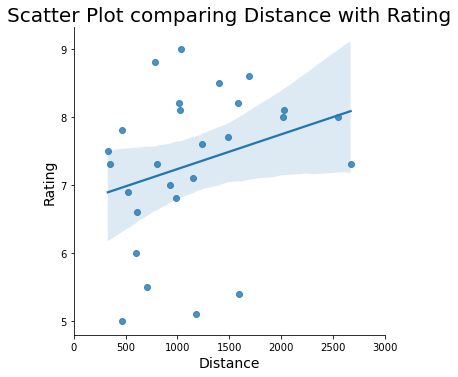

In [95]:
# Scatter plot comparing Distance and Rating to assess if any relationship
sns.lmplot(x='distance',y='Rating',data=df_combined,fit_reg=True)
plt.xlabel('Distance',size=14)
plt.ylabel('Rating',size=14)
plt.xlim(0,3000)
plt.title('Scatter Plot comparing Distance with Rating', size=20)

Text(0.5, 1.0, 'Scatter Plot comparing Price Score with Rating')

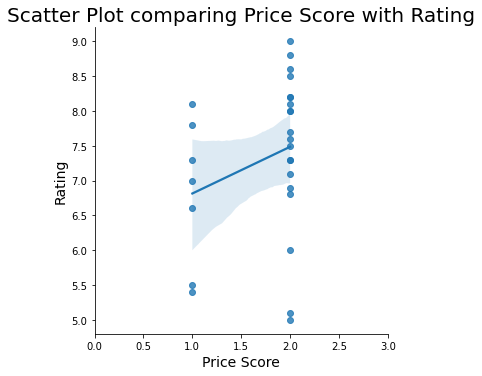

In [96]:
# Scatter plot comparing Price Score and Rating to assess if any relationship
sns.lmplot(x='Price_Score',y='Rating',data=df_combined,fit_reg=True)
plt.xlabel('Price Score', size=14)
plt.ylabel('Rating', size=14)
plt.xlim(0,3)
plt.title('Scatter Plot comparing Price Score with Rating',size=20)

In [122]:
UIC_map = folium.Map(location=[UIClatitude, UIClongitude], zoom_start=14) # generate map centred around UIC

# add a red circle marker to represent UIC
folium.CircleMarker(
    [UIClatitude, UIClongitude],
    radius=10,
    color='red',
    popup='University of Illinois at Chicago',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(UIC_map)

# add the filtered restaurants as blue circle markers
for lat, lng, label in zip(df_UICrestaurants_filtered.lat, df_UICrestaurants_filtered.lng, df_UICrestaurants_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(UIC_map)

# display map
UIC_map


In [118]:
DU_map = folium.Map(location=[DUlatitude, DUlongitude], zoom_start=14) # generate map centred around DU

# add a red circle marker to represent DU
folium.CircleMarker(
    [DUlatitude, DUlongitude],
    radius=10,
    color='red',
    popup='DePaul University',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(DU_map)

# add the filtered restaurants as blue circle markers
for lat, lng, label in zip(df_DUrestaurants_filtered.lat, df_DUrestaurants_filtered.lng, df_DUrestaurants_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(DU_map)

# display map
DU_map


In [123]:
LUC_map = folium.Map(location=[LUClatitude, LUClongitude], zoom_start=14) # generate map centred around LUC

# add a red circle marker to represent LUC
folium.CircleMarker(
    [LUClatitude, LUClongitude],
    radius=10,
    color='red',
    popup='Loyola University Chicago',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(LUC_map)

# add the filtered restaurants as blue circle markers
for lat, lng, label in zip(df_LUCrestaurants_filtered.lat, df_LUCrestaurants_filtered.lng, df_LUCrestaurants_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(LUC_map)

# display map
LUC_map
